In [1]:
import seaborn as sns
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

c:\Users\akbul\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
sibsp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [4]:
def check_df(dataframe,head=5):
    print("###Shape####")
    print(dataframe.shape)
    print("####Types####")
    print(dataframe.dtypes)
    print("###Head###")
    print(dataframe.head(head))
    print("###Tail###")
    print(dataframe.tail(head))
check_df(df)

###Shape####
(891, 15)
####Types####
survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object
###Head###
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman     

###Analysis of Categorical Variables 

In [5]:
cat_col=[col for col in df.columns if str(df[col].dtypes) in ["category","object","bool"]]
cat_col

['sex',
 'embarked',
 'class',
 'who',
 'adult_male',
 'deck',
 'embark_town',
 'alive',
 'alone']

In [6]:
str(df["sex"].dtypes) in ["object"] 

True

In [7]:
num_but_cot=[col for col in df.columns if df[col].nunique() < 10 and df[col].dtypes in ["int","float"]]
num_but_cot

[]

In [8]:
cat_but_car =[col for col in df.columns if df[col].nunique() > 20 and str(df[col].dtypes) in ["category","object","bool"] ]
cat_but_car

[]

In [9]:
cat_col = cat_col + num_but_cot

In [10]:
df[cat_col].nunique()

sex            2
embarked       3
class          3
who            3
adult_male     2
deck           7
embark_town    3
alive          2
alone          2
dtype: int64

In [11]:
def cat_summary(dataframe,col_name):
    print(pd.DataFrame({col_name:dataframe[col_name].value_counts(),
                        "Ratio": 100*dataframe[col_name].value_counts()/len(dataframe)
                        }))


In [12]:
for col in cat_col:
    cat_summary(df,col)

        sex      Ratio
male    577  64.758698
female  314  35.241302
   embarked      Ratio
S       644  72.278339
C       168  18.855219
Q        77   8.641975
        class      Ratio
Third     491  55.106622
First     216  24.242424
Second    184  20.650954
       who      Ratio
man    537  60.269360
woman  271  30.415264
child   83   9.315376
       adult_male     Ratio
True          537  60.26936
False         354  39.73064
   deck     Ratio
C    59  6.621773
B    47  5.274972
D    33  3.703704
E    32  3.591470
A    15  1.683502
F    13  1.459035
G     4  0.448934
             embark_town      Ratio
Southampton          644  72.278339
Cherbourg            168  18.855219
Queenstown            77   8.641975
     alive      Ratio
no     549  61.616162
yes    342  38.383838
       alone     Ratio
True     537  60.26936
False    354  39.73064


ANALYSİS OF CATEGORİCAL VARIABLES

        sex      Ratio
male    577  64.758698
female  314  35.241302


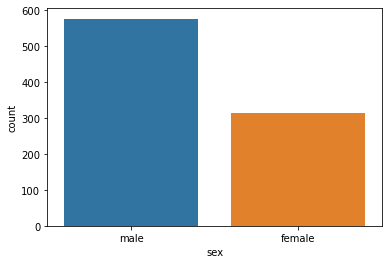

In [13]:
def cat_summary(dataframe,col_name,plot=False):
    print(pd.DataFrame({col_name:dataframe[col_name].value_counts(),
                        "Ratio": 100*dataframe[col_name].value_counts()/len(dataframe)
                        }))
    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show(block=True)
cat_summary(df,"sex",True)


        sex      Ratio
male    577  64.758698
female  314  35.241302


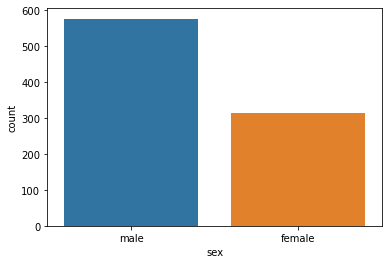

   embarked      Ratio
S       644  72.278339
C       168  18.855219
Q        77   8.641975


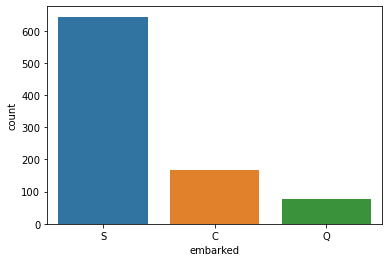

        class      Ratio
Third     491  55.106622
First     216  24.242424
Second    184  20.650954


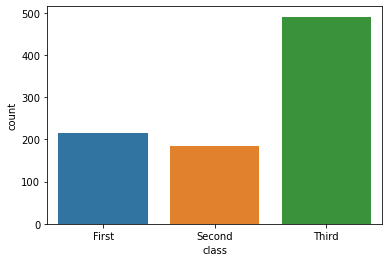

       who      Ratio
man    537  60.269360
woman  271  30.415264
child   83   9.315376


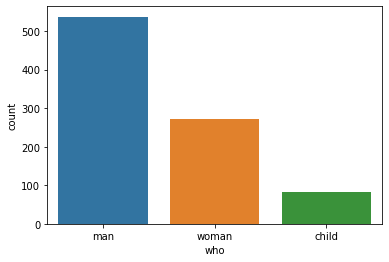

BOOL
   deck     Ratio
C    59  6.621773
B    47  5.274972
D    33  3.703704
E    32  3.591470
A    15  1.683502
F    13  1.459035
G     4  0.448934


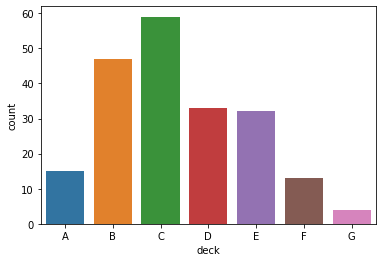

             embark_town      Ratio
Southampton          644  72.278339
Cherbourg            168  18.855219
Queenstown            77   8.641975


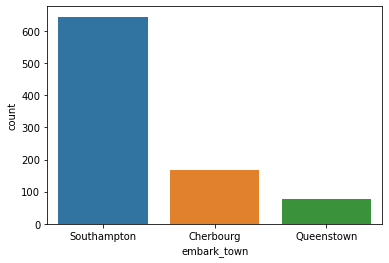

     alive      Ratio
no     549  61.616162
yes    342  38.383838


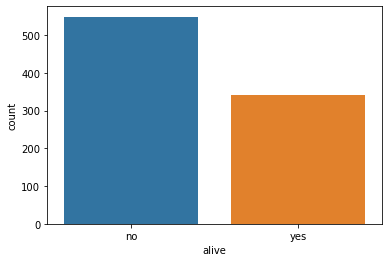

BOOL


In [14]:
for col in cat_col:
    if df[col].dtypes == "bool":
        print("BOOL")
    else:    
     cat_summary(df,col,True)

In [15]:
df[["age","fare"]].describe().T

,count,mean,std,min,25%,50%,75%,max
age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [16]:
num_cols=[col for col in df.columns if df[col].dtypes in ["int","float"]]

Capturing Variables and Generalizing Operations

In [17]:
def grab_col_names(dataframe,cat_th=10,car_th=20):
  num_but_cot=[col for col in df.columns if df[col].nunique() < 10 and df[col].dtypes in ["int","float"]]
  cat_but_car =[col for col in df.columns if df[col].nunique() > 20 and str(df[col].dtypes) in ["category","object","bool"] ]
  cat_col = cat_col + num_but_cat
  cat_col = [col for col in df.columns if col not in cat_but_car]
  return cat_col,num_but_cot,cat_but_car


Analysis of Target Variable


In [18]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [19]:
cat_summary(df,"survived")

   survived      Ratio
0       549  61.616162
1       342  38.383838


In [20]:
df.groupby("sex")["survived"].mean()

sex
female    0.742038
male      0.188908
Name: survived, dtype: float64

In [21]:
def target_summary(dataframe,target,categorical_col):
    print(pd.DataFrame({"TARGET_MEAN" : dataframe.groupby(categorical_col)[target].mean()}))


In [22]:
target_summary(df,"survived","sex")

        TARGET_MEAN
sex                
female     0.742038
male       0.188908


In [23]:
target_summary(df,"survived","class")

        TARGET_MEAN
class              
First      0.629630
Second     0.472826
Third      0.242363


Analysis of Correlation

In [34]:
df1=pd.read_csv("breast_cancer.csv")
df1.iloc[:,1:-1]
df1.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [25]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


In [35]:
num_col=[col for col in df1.columns if df1[col].dtypes in [int,float]]
num_col

['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst',
 'Unnamed: 32']

In [37]:
corr=df1.corr()
corr

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,1.000000,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,-0.022114,...,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866,NaN
radius_mean,0.074626,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,NaN
texture_mean,0.099770,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,NaN
perimeter_mean,0.073159,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,NaN
area_mean,0.096893,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,NaN
smoothness_mean,-0.012968,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,NaN
compactness_mean,0.000096,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,NaN
concavity_mean,0.050080,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,NaN
concave points_mean,0.044158,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,NaN
symmetry_mean,-0.022114,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,NaN


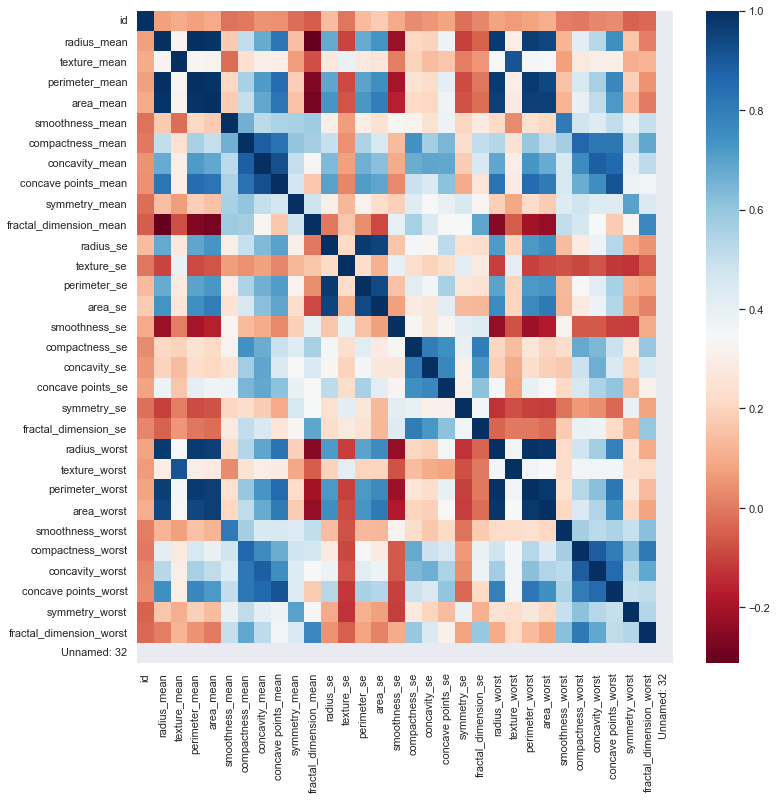

In [38]:
sns.set(rc={'figure.figsize':(12,12)})
sns.heatmap(corr,cmap="RdBu")
plt.show()

Deletion of highly correlated Variables

In [39]:
cor_matrix=df.corr().abs()


In [42]:
upper_triangle_matrix=cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool_))

In [55]:
upper_triangle_matrix



,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,NaN,0.338481,0.077221,0.035322,0.081629,0.257307,0.557080,0.203367
pclass,NaN,NaN,0.369226,0.083081,0.018443,0.549500,0.094035,0.135207
age,NaN,NaN,NaN,0.308247,0.189119,0.096067,0.280328,0.198270
sibsp,NaN,NaN,NaN,NaN,0.414838,0.159651,0.253586,0.584471
parch,NaN,NaN,NaN,NaN,NaN,0.216225,0.349943,0.583398
fare,NaN,NaN,NaN,NaN,NaN,NaN,0.182024,0.271832
adult_male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.404744
alone,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


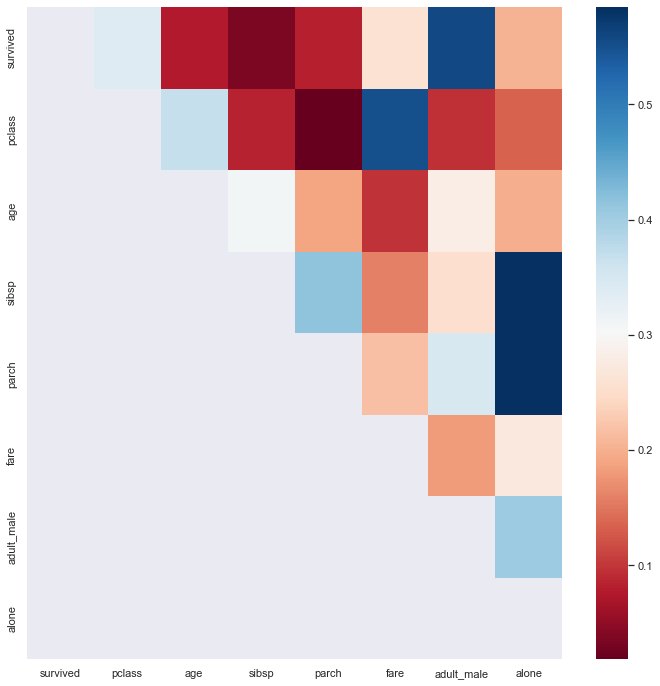

In [46]:
sns.set(rc={'figure.figsize':(12,12)})
sns.heatmap(upper_triangle_matrix,cmap="RdBu")
plt.show()

In [53]:
drop_list=[col for col in upper_triangle_matrix.columns if any(upper_triangle_matrix[col] > 0.90) ]


In [54]:
drop_list

[]

In [57]:
def high_corralated_cols(dataframe,plot=False,corr_th=0):
    corr = dataframe.corr()
    corr_matrix=corr.abs()
    upper_triangle_matrix = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
    drop_list=[col for col in upper_triangle_matrix.columns if any(upper_triangle_matrix[col] > 0.90)]
    if plot:
        import seaborn as sns
        import matplotlib.pyplot as plt
        sns.set(rc={'figure.figsize':(12,12)})
        sns.heatmap(corr,cmap="RdBu")
        plt.show()
    return drop_list

In [60]:
drop_list = high_corralated_cols(df,plot=True)

C:\Users\akbul\AppData\Local\Temp/ipykernel_1788/3859257173.py:4: FutureWarning: In the future `np.bool` will be defined as the corresponding NumPy scalar.  (This may have returned Python scalars in past versions.
  upper_triangle_matrix = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))


AttributeError: module 'numpy' has no attribute 'bool'